<a href="https://colab.research.google.com/github/halisson-gomides/Curso-ENAP-Ciencia_dados2020/blob/master/API_especiais_consumindo_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Configuração do Ambiente

In [ ]:
! pip list | grep -E 'pandas|requests|urllib3'

In [ ]:
# Caso a célula acima não gere nenhum retorno ou na lista retornada
# não conste uma ou mais das bilibotecas importadas na próxima célula,
# executar essa célula
!pip install pandas, requests, urllib3

In [12]:
import requests
import urllib3
import pandas as pd

In [42]:
pd.set_option('display.max_columns', None)

### Funções úteis

In [2]:
def api_request(method, url, headers=None, params=None, data=None, json=None, timeout=10):
    """
    Realiza uma requisição a uma API.

    Args:
        method: O método HTTP da requisição (GET, POST, PUT, DELETE, etc.).
        url: A URL da API.
        headers: Um dicionário com os headers da requisição.
        params: Um dicionário com os parâmetros da query string.
        data: Os dados da requisição (para métodos como POST e PUT).
        json: Os dados da requisição em formato JSON (para métodos como POST e PUT).
        timeout: O tempo limite da requisição em segundos.

    Returns:
        Um objeto Response do requests ou None em caso de erro.
    """
    try:
        response = requests.request(method, url, headers=headers, params=params, data=data, json=json, timeout=timeout)
        response.raise_for_status()  # Levanta uma exceção para status codes de erro (4xx ou 5xx)
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Erro na requisição: {e.__repr__()}")
        return None


In [21]:
[_i for _i in range(2020,2026)]

[2020, 2021, 2022, 2023, 2024, 2025]

### Requisição a API

In [36]:
print('*'*100)

****************************************************************************************************


In [39]:
# Transferencias Especiais - Plano de ação Especiais
api_url = "https://api.transferegov.gestao.gov.br/transferenciasespeciais/plano_acao_especial"
ano_inicial = 2022
ano_final = 2024
qtd_pgs = 20
qtd_por_pag = 1000
lst_anos = [_i for _i in range(ano_inicial,ano_final + 1)]
lst_pgs = [_i for _i in range(qtd_pgs)]
df_paes_raw = pd.DataFrame()

for ano in lst_anos:
  for page in lst_pgs:
    api_params = {
        'ano_plano_acao': f'eq.{ano}',
        'offset': (page * qtd_por_pag),
        'limit': qtd_por_pag
    }
    result = api_request("GET", api_url, params=api_params)
    df_result = pd.DataFrame.from_dict(result, orient='columns')
    if df_result.empty:
      print('*'*100)
      break
    df_paes_raw = pd.concat([df_paes_raw, df_result])
    print(f"Ano: {ano:<5} Pg. {page:<5}- Qtd. Registros: {len(df_paes_raw.loc[df_paes_raw['ano_plano_acao'] == ano])}")
  else:
    print('*'*100)


print(f"\nTotal de linhas: {len(df_paes_raw)}\n")
df_paes_raw.head(10)

Ano: 2022  Pg. 0    - Qtd. Registros: 1000
Ano: 2022  Pg. 1    - Qtd. Registros: 2000
Ano: 2022  Pg. 2    - Qtd. Registros: 3000
Ano: 2022  Pg. 3    - Qtd. Registros: 4000
Ano: 2022  Pg. 4    - Qtd. Registros: 5000
Ano: 2022  Pg. 5    - Qtd. Registros: 6000
Ano: 2022  Pg. 6    - Qtd. Registros: 7000
Ano: 2022  Pg. 7    - Qtd. Registros: 8000
Ano: 2022  Pg. 8    - Qtd. Registros: 8514
****************************************************************************************************
Ano: 2023  Pg. 0    - Qtd. Registros: 1000
Ano: 2023  Pg. 1    - Qtd. Registros: 2000
Ano: 2023  Pg. 2    - Qtd. Registros: 3000
Ano: 2023  Pg. 3    - Qtd. Registros: 4000
Ano: 2023  Pg. 4    - Qtd. Registros: 5000
Ano: 2023  Pg. 5    - Qtd. Registros: 6000
Ano: 2023  Pg. 6    - Qtd. Registros: 7000
Ano: 2023  Pg. 7    - Qtd. Registros: 8000
Ano: 2023  Pg. 8    - Qtd. Registros: 9000
Ano: 2023  Pg. 9    - Qtd. Registros: 9273
**********************************************************************************

,id_plano_acao,codigo_plano_acao,ano_plano_acao,modalidade_plano_acao,situacao_plano_acao,cnpj_beneficiario_plano_acao,nome_beneficiario_plano_acao,uf_beneficiario_plano_acao,codigo_banco_plano_acao,codigo_situacao_dado_bancario_plano_acao,...,codigo_parlamentar_emenda_plano_acao,sequencial_emenda_parlamentar_plano_acao,numero_emenda_parlamentar_plano_acao,codigo_emenda_parlamentar_formatado_plano_acao,codigo_descricao_areas_politicas_publicas_plano_acao,descricao_programacao_orcamentaria_plano_acao,motivo_impedimento_plano_acao,valor_custeio_plano_acao,valor_investimento_plano_acao,id_programa
0,22206,09032022-3-022206,2022,Especial,IMPEDIDO,04391512000187,MUNICIPIO DE COLORADO DO OESTE,RO,None,NaN,...,3096,3,202230960003,202230960003-Expedito Netto,None,None,None,100000.0,100000.0,9
1,22207,09032022-3-022207,2022,Especial,IMPEDIDO,15845340000190,MUNICIPIO DE ALVORADA D:OESTE,RO,None,NaN,...,3096,3,202230960003,202230960003-Expedito Netto,None,None,None,200000.0,0.0,9
2,22208,09032022-3-022208,2022,Especial,IMPEDIDO,63761969000103,MUNICIPIO DE CASTANHEIRAS,RO,None,NaN,...,3096,3,202230960003,202230960003-Expedito Netto,None,None,None,0.0,200000.0,9
3,22209,09032022-3-022209,2022,Especial,IMPEDIDO,63787071000104,MUNICIPIO DE MIRANTE DA SERRA,RO,None,NaN,...,3096,3,202230960003,202230960003-Expedito Netto,None,None,None,100000.0,0.0,9
4,22210,09032022-3-022210,2022,Especial,IMPEDIDO,63761993000134,MUNICIPIO DE SERINGUEIRAS,RO,None,NaN,...,3096,3,202230960003,202230960003-Expedito Netto,None,None,None,75318.0,0.0,9
5,22211,09032022-3-022211,2022,Especial,IMPEDIDO,63787097000144,MUNICIPIO DE URUPA,RO,None,NaN,...,3096,3,202230960003,202230960003-Expedito Netto,None,None,None,100000.0,500000.0,9
6,22212,09032022-3-022212,2022,Especial,IMPEDIDO,15834732000154,MUNICIPIO DE ALTA FLORESTA D'OESTE,RO,None,NaN,...,3096,3,202230960003,202230960003-Expedito Netto,None,None,None,0.0,150000.0,9
7,22248,09032022-3-022248,2022,Especial,IMPEDIDO,37344355000108,MUNICIPIO DE SANDOLANDIA,TO,None,NaN,...,3973,6,202239730006,202239730006-Eli Borges,None,None,None,150000.0,0.0,9
8,22249,09032022-3-022249,2022,Especial,IMPEDIDO,02070712000102,MUNICIPIO DE TOCANTINIA,TO,None,NaN,...,3973,6,202239730006,202239730006-Eli Borges,None,None,None,0.0,500000.0,9
9,22285,09032022-3-022285,2022,Especial,IMPEDIDO,87890992000158,MUNICIPIO DE GRAVATAI,RS,None,NaN,...,4121,2,202241210002,202241210002-Nereu Crispim,None,None,None,10000.0,0.0,9


In [41]:
# Verificação se existem registros DUPLICADOS

df_paes_raw.duplicated(subset=['id_plano_acao', 'codigo_plano_acao']).sum()

np.int64(0)

In [43]:
df_paes_raw.head()

,id_plano_acao,codigo_plano_acao,ano_plano_acao,modalidade_plano_acao,situacao_plano_acao,cnpj_beneficiario_plano_acao,nome_beneficiario_plano_acao,uf_beneficiario_plano_acao,codigo_banco_plano_acao,codigo_situacao_dado_bancario_plano_acao,nome_banco_plano_acao,numero_agencia_plano_acao,dv_agencia_plano_acao,numero_conta_plano_acao,dv_conta_plano_acao,nome_parlamentar_emenda_plano_acao,ano_emenda_parlamentar_plano_acao,codigo_parlamentar_emenda_plano_acao,sequencial_emenda_parlamentar_plano_acao,numero_emenda_parlamentar_plano_acao,codigo_emenda_parlamentar_formatado_plano_acao,codigo_descricao_areas_politicas_publicas_plano_acao,descricao_programacao_orcamentaria_plano_acao,motivo_impedimento_plano_acao,valor_custeio_plano_acao,valor_investimento_plano_acao,id_programa
0,22206,09032022-3-022206,2022,Especial,IMPEDIDO,04391512000187,MUNICIPIO DE COLORADO DO OESTE,RO,None,NaN,None,NaN,None,NaN,None,Expedito Netto,2022,3096,3,202230960003,202230960003-Expedito Netto,None,None,None,100000.0,100000.0,9
1,22207,09032022-3-022207,2022,Especial,IMPEDIDO,15845340000190,MUNICIPIO DE ALVORADA D:OESTE,RO,None,NaN,None,NaN,None,NaN,None,Expedito Netto,2022,3096,3,202230960003,202230960003-Expedito Netto,None,None,None,200000.0,0.0,9
2,22208,09032022-3-022208,2022,Especial,IMPEDIDO,63761969000103,MUNICIPIO DE CASTANHEIRAS,RO,None,NaN,None,NaN,None,NaN,None,Expedito Netto,2022,3096,3,202230960003,202230960003-Expedito Netto,None,None,None,0.0,200000.0,9
3,22209,09032022-3-022209,2022,Especial,IMPEDIDO,63787071000104,MUNICIPIO DE MIRANTE DA SERRA,RO,None,NaN,None,NaN,None,NaN,None,Expedito Netto,2022,3096,3,202230960003,202230960003-Expedito Netto,None,None,None,100000.0,0.0,9
4,22210,09032022-3-022210,2022,Especial,IMPEDIDO,63761993000134,MUNICIPIO DE SERINGUEIRAS,RO,None,NaN,None,NaN,None,NaN,None,Expedito Netto,2022,3096,3,202230960003,202230960003-Expedito Netto,None,None,None,75318.0,0.0,9


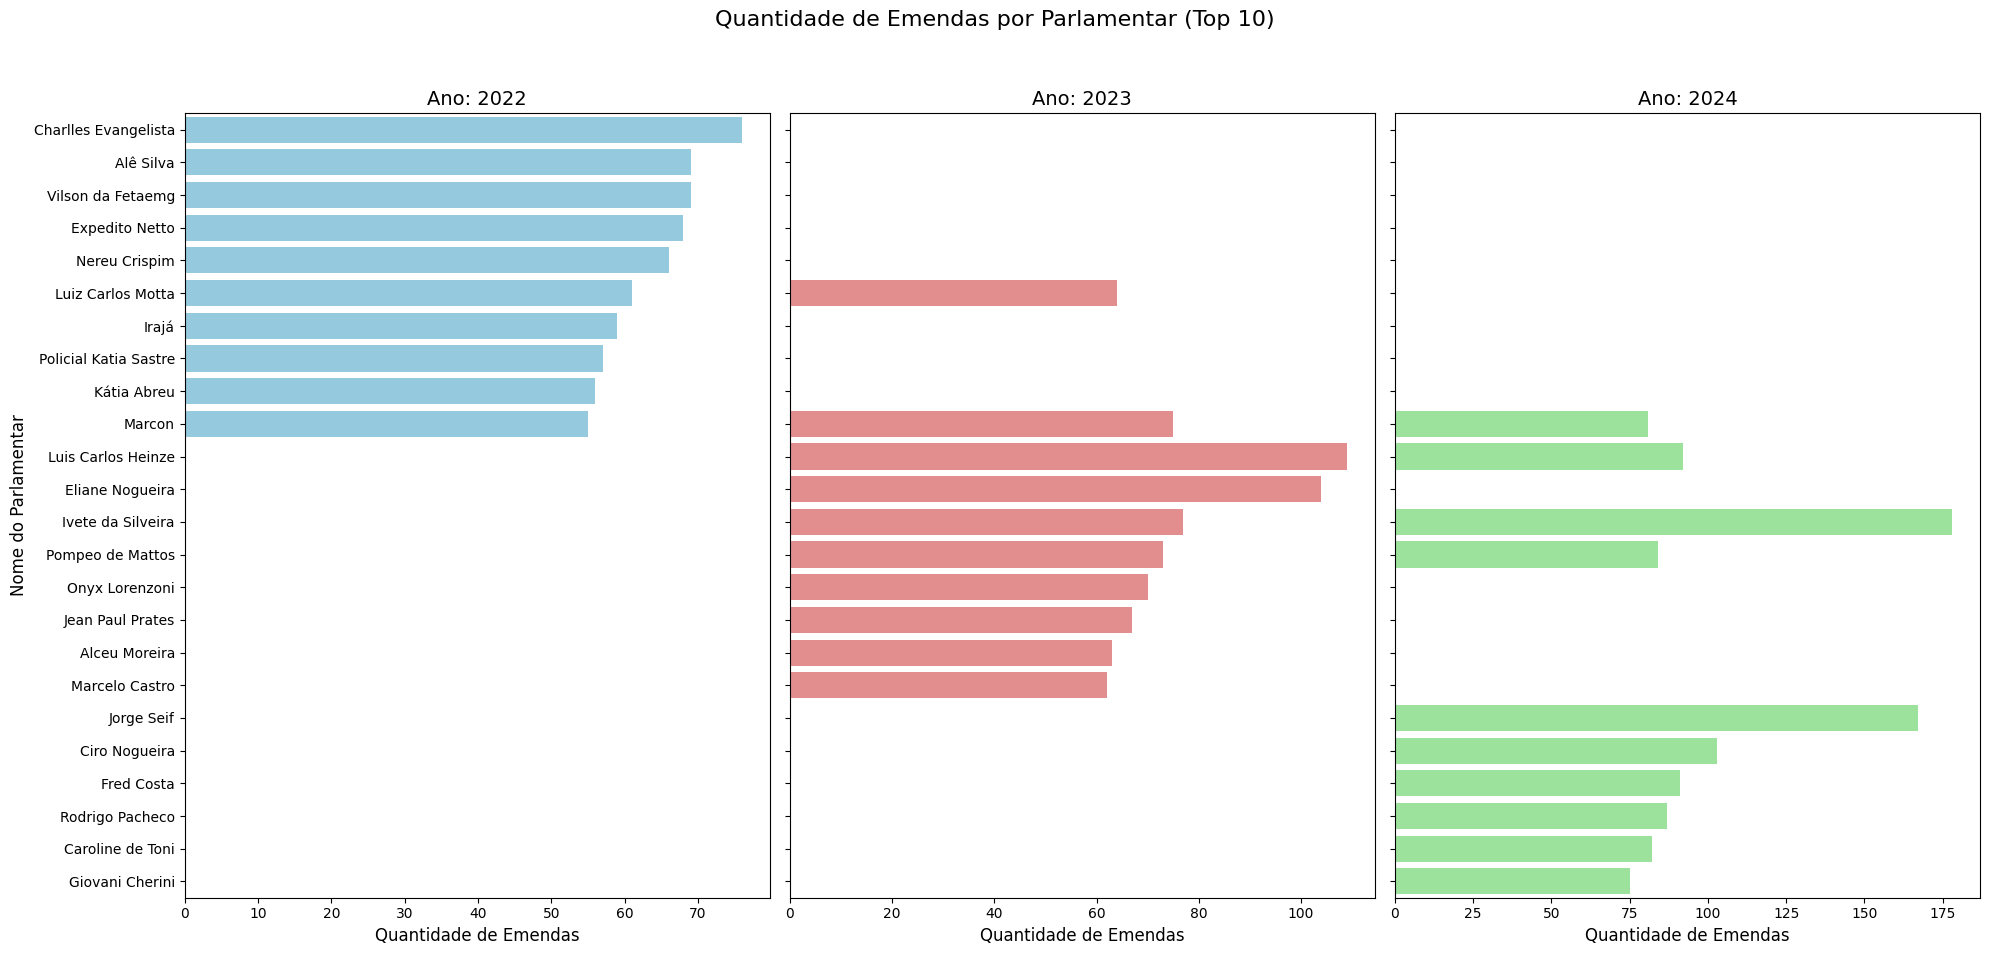

In [48]:
# prompt: baseado no dataframe df_paes_raw, gere 03 gráficos de qtd de emendas por nome_parlamentar_emenda_plano_acao, um para cada ano_emenda_parlamentar_plano_acao. O gráfico deve ser de barras horizontais, com o nome do parlamentar no eixo Y, com barras agrupadas representando as quantidades de cada ano. Ordene por qtd de emendas do maior para o menor, e exiba apenas os top 10. Exiba cada gráfico em um quadrante e varie as cores das barras para cada ano.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convertendo a coluna 'ano_emenda_parlamentar_plano_acao' para numérico
df_paes_raw['ano_emenda_parlamentar_plano_acao'] = pd.to_numeric(df_paes_raw['ano_emenda_parlamentar_plano_acao'], errors='coerce')

# Agrupando os dados e ordenando
emendas_por_parlamentar = df_paes_raw.groupby(['nome_parlamentar_emenda_plano_acao', 'ano_emenda_parlamentar_plano_acao']).size().reset_index(name='quantidade')
emendas_por_parlamentar = emendas_por_parlamentar.sort_values(['ano_emenda_parlamentar_plano_acao', 'quantidade'], ascending=[True, False])

# Criando a figura e os eixos
fig, axes = plt.subplots(1, 3, figsize=(20, 10), sharey=True)
fig.suptitle('Quantidade de Emendas por Parlamentar (Top 10)', fontsize=16)


anos = emendas_por_parlamentar['ano_emenda_parlamentar_plano_acao'].unique()
cores = ['skyblue', 'lightcoral', 'lightgreen']

for i, ano in enumerate(anos):
  ax = axes[i]
  df_ano = emendas_por_parlamentar[emendas_por_parlamentar['ano_emenda_parlamentar_plano_acao'] == ano].head(10)

  sns.barplot(x='quantidade', y='nome_parlamentar_emenda_plano_acao', data=df_ano, ax=ax, color=cores[i % len(cores)], orient='h')

  ax.set_title(f'Ano: {int(ano)}', fontsize=14)
  ax.set_xlabel('Quantidade de Emendas', fontsize=12)
  ax.set_ylabel('Nome do Parlamentar', fontsize=12)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [54]:
df_paes_agrupado = (df_paes_raw.groupby(['nome_parlamentar_emenda_plano_acao', 'ano_emenda_parlamentar_plano_acao'])
.agg({'numero_emenda_parlamentar_plano_acao': 'count', 'valor_custeio_plano_acao': 'sum', 'valor_investimento_plano_acao': 'sum'})
.reset_index())

df_paes_agrupado.loc[df_paes_agrupado['ano_emenda_parlamentar_plano_acao'] == 2023].sort_values('numero_emenda_parlamentar_plano_acao', ascending=False).head(10)

,nome_parlamentar_emenda_plano_acao,ano_emenda_parlamentar_plano_acao,numero_emenda_parlamentar_plano_acao,valor_custeio_plano_acao,valor_investimento_plano_acao
901,Luis Carlos Heinze,2023,109,6243285.0,26692414.0
466,Eliane Nogueira,2023,104,0.0,29371970.0
702,Ivete da Silveira,2023,77,499128.0,23310160.0
983,Marcon,2023,75,0.0,14662883.0
1235,Pompeo de Mattos,2023,73,0.0,14015186.0
1121,Onyx Lorenzoni,2023,70,0.0,14422489.0
726,Jean Paul Prates,2023,67,2000000.0,23271785.0
916,Luiz Carlos Motta,2023,64,0.0,16051617.0
44,Alceu Moreira,2023,63,0.0,13922487.0
962,Marcelo Castro,2023,62,6975195.0,19519215.0


In [ ]:
# b) Valor de emendas por nome de parlamentar e ano
# Convertendo a coluna 'valor_emenda' para numérico, tratando possíveis erros
df_paes_raw['valor_emenda'] = pd.to_numeric(df_paes_raw['valor_emenda'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.barplot(x='ano_plano_acao', y='valor_emenda', hue='nome_parlamentar', data=df_paes_raw, ci=None, estimator=sum) #ci=None remove intervalos de confiança
plt.title('Valor Total de Emendas por Parlamentar e Ano')
plt.xlabel('Ano')
plt.ylabel('Valor Total das Emendas')
plt.xticks(rotation=45)
plt.legend(title='Nome do Parlamentar', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [17]:
api_url = "https://dadosabertos.camara.leg.br/api/v2/deputados"
result = api_request("GET", api_url)
df_dep_raw = pd.DataFrame.from_dict(result['dados'], orient='columns')
print(f"Total de linhas: {len(df_dep_raw)}")
df_dep_raw.head(10)

Total de linhas: 513


,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
1,220714,https://dadosabertos.camara.leg.br/api/v2/depu...,Adail Filho,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,AM,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adailfilho@camara.leg.br
2,221328,https://dadosabertos.camara.leg.br/api/v2/depu...,Adilson Barroso,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adilsonbarroso@camara.leg.br
3,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br
4,204528,https://dadosabertos.camara.leg.br/api/v2/depu...,Adriana Ventura,NOVO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adrianaventura@camara.leg.br
5,121948,https://dadosabertos.camara.leg.br/api/v2/depu...,Adriano do Baldy,PP,https://dadosabertos.camara.leg.br/api/v2/part...,GO,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adrianodobaldy@camara.leg.br
6,74646,https://dadosabertos.camara.leg.br/api/v2/depu...,Aécio Neves,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,MG,57,https://www.camara.leg.br/internet/deputado/ba...,dep.aecioneves@camara.leg.br
7,136811,https://dadosabertos.camara.leg.br/api/v2/depu...,Afonso Hamm,PP,https://dadosabertos.camara.leg.br/api/v2/part...,RS,57,https://www.camara.leg.br/internet/deputado/ba...,dep.afonsohamm@camara.leg.br
8,178835,https://dadosabertos.camara.leg.br/api/v2/depu...,Afonso Motta,PDT,https://dadosabertos.camara.leg.br/api/v2/part...,RS,57,https://www.camara.leg.br/internet/deputado/ba...,dep.afonsomotta@camara.leg.br
9,160527,https://dadosabertos.camara.leg.br/api/v2/depu...,Aguinaldo Ribeiro,PP,https://dadosabertos.camara.leg.br/api/v2/part...,PB,57,https://www.camara.leg.br/internet/deputado/ba...,dep.aguinaldoribeiro@camara.leg.br
